Iteration    0: Cost 0.6846104685605718   
Iteration 1000: Cost 0.15909776668704453   
Iteration 2000: Cost 0.08460064176929973   
Iteration 3000: Cost 0.05705327279402422   
Iteration 4000: Cost 0.04290759421681895   
Iteration 5000: Cost 0.03433847729884453   
Iteration 6000: Cost 0.028603798022119032   
Iteration 7000: Cost 0.024501569608791976   
Iteration 8000: Cost 0.021423703325691892   
Iteration 9000: Cost 0.019030137124108098   


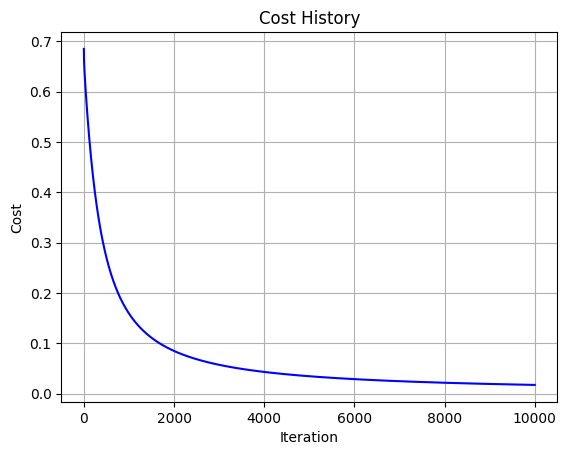


updated parameters: w:[5.28123029 5.07815608], b:-14.222409982019837


In [10]:
# Gradient descent for logistic regression
import numpy as np
import sys
import matplotlib.pyplot as plt
import copy
import math

def compute_cost_logistic(X, y, w, b):
    """
    Compute the cost for logistic regression.
    
    Parameters:
    X : numpy.ndarray
        Input features, shape (n_samples, n_features).
    y : numpy.ndarray
        True labels, shape (n_samples,).
    w : numpy.ndarray
        Weights, shape (n_features,).
    b : float
        Bias term.
    
    Returns:
    J : float
        Computed cost.
    """
    n_samples = X.shape[0]
    
    # Compute predictions using the logistic function
    z = np.dot(X, w) + b
    predictions = 1 / (1 + np.exp(-z))
    
    # Compute the cost using the logistic loss function
    J = -np.mean(y * np.log(predictions + 1e-15) + (1 - y) * np.log(1 - predictions + 1e-15))
    
    return J

def compute_gradient_logistic(X, y, w, b):
    """
    Compute the gradient of the logistic loss function with respect to weights and bias.
    
    Parameters:
    X : numpy.ndarray
        Input features, shape (n_samples, n_features).
    y : numpy.ndarray
        True labels, shape (n_samples,).
    w : numpy.ndarray
        Weights, shape (n_features,).
    b : float
        Bias term.
    
    Returns:
    dw : numpy.ndarray
        Gradient with respect to weights, shape (n_features,).
    db : float
        Gradient with respect to bias.
    """
    n_samples = X.shape[0]
    
    # Compute predictions using the logistic function
    z = np.dot(X, w) + b
    predictions = 1 / (1 + np.exp(-z))
    
    # Compute the error
    error = predictions - y
    
    # Compute gradients
    dw = np.dot(X.T, error) / n_samples
    db = np.sum(error) / n_samples
    
    return dw, db

def gradient_descent(X, y, w_in, b_in, alpha, num_iters):
    """
    Perform gradient descent to optimize weights and bias for logistic regression.
    
    Parameters:
    X : numpy.ndarray
        Input features, shape (n_samples, n_features).
    y : numpy.ndarray
        True labels, shape (n_samples,).
    w_in : numpy.ndarray
        Initial weights, shape (n_features,).
    b_in : float
        Initial bias term.
    alpha : float
        Learning rate.
    num_iters : int
        Number of iterations for gradient descent.
    Returns:
    w : numpy.ndarray
        Optimized weights, shape (n_features,).
    b : float
        Optimized bias term.
    """
    J_history = []
    w = copy.deepcopy(w_in)  #avoid modifying global w within function
    b = b_in
    
    for i in range(num_iters):
        dj_dw, dj_db = compute_gradient_logistic(X, y, w, b)


        # Update Parameters using w, b, alpha and gradient
        w = w - alpha * dj_dw               
        b = b - alpha * dj_db               
      
        # Save cost J at each iteration
        if i<100000:      # prevent resource exhaustion 
            J_history.append( compute_cost_logistic(X, y, w, b) )

        # Print cost every at intervals 10 times or as many iterations if < 10
        if i% math.ceil(num_iters / 10) == 0:
            print(f"Iteration {i:4d}: Cost {J_history[-1]}   ")
    
    return w, b, J_history

def plot_cost_history(J_history):
    """
    Plot the cost history over iterations.
    
    Parameters:
    J_history : list
        List of cost values at each iteration.
    """
    plt.plot(J_history, 'b-')
    plt.xlabel('Iteration')
    plt.ylabel('Cost')
    plt.title('Cost History')
    plt.grid()
    plt.show()

if __name__ == "__main__":
    X_train = np.array([[0.5, 1.5], [1,1], [1.5, 0.5], [3, 0.5], [2, 2], [1, 2.5]])
    y_train = np.array([0, 0, 0, 1, 1, 1])
    w_tmp  = np.zeros_like(X_train[0])
    b_tmp  = 0.
    alph = 0.1
    iters = 10000

    w_out, b_out, J_history = gradient_descent(X_train, y_train, w_tmp, b_tmp, alph, iters)
    plot_cost_history(J_history)
    print(f"\nupdated parameters: w:{w_out}, b:{b_out}")
